In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_excel('heart_disease.xlsx', sheet_name =1)
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0


In [3]:
data = data.rename(columns={'age':'Age','sex':'Sex','trestbps':'restbp','thalch':'max_heart_rate','exang':'ex_ang','num':'target'})

In [4]:
data

,Age,Sex,cp,restbp,chol,fbs,restecg,max_heart_rate,ex_ang,oldpeak,slope,thal,target
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
data['ex_ang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [6]:
data=data.replace({True: 1, False: 0})
data=data.replace({'FALSE': False,'TURE':True})
data.head()

,Age,Sex,cp,restbp,chol,fbs,restecg,max_heart_rate,ex_ang,oldpeak,slope,thal,target
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,0,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,0,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,0,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,0,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,1,1.5,flat,fixed defect,0


In [7]:
## Define the mapping dictionary
data['Sex']=data['Sex'].map({'Male':1,'Female':2})
data['cp']=data['cp'].map({'typical angina':1,'atypical angina':2,'asymptomatic':3,'non-anginal':4})
data['restecg']=data['restecg'].map({'lv hypertrophy':1,'normal':2,'st-t abnormality':3})
data['slope']=data['slope'].map({'downsloping':1,'flat':2,'upsloping':3})
data['thal']=data['thal'].map({'fixed defect':1,'normal':2,'reversable defect':3})
data.head()

,Age,Sex,cp,restbp,chol,fbs,restecg,max_heart_rate,ex_ang,oldpeak,slope,thal,target
0,63,1,1,145,233,1,1,150,0,2.3,1,1,0
1,41,1,2,135,203,0,2,132,0,0.0,2,1,0
2,57,1,3,140,192,0,2,148,0,0.4,2,1,0
3,52,1,1,118,186,0,1,190,0,0.0,2,1,0
4,57,1,3,110,201,0,2,126,1,1.5,2,1,0


In [8]:
data['ex_ang'].unique()

array([0, 1], dtype=object)

In [9]:
data.isnull().sum()

Age                0
Sex                0
cp                 0
restbp             0
chol               0
fbs                0
restecg            0
max_heart_rate     0
ex_ang             0
oldpeak           62
slope              0
thal               0
target             0
dtype: int64

In [10]:
data['thal'].value_counts()

thal
2    386
3    346
1    176
Name: count, dtype: int64

In [11]:
data.shape

(908, 13)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
Sex,908.0,1.209251,0.406998,1.0,1.00,1.0,1.0,2.0
cp,908.0,2.942731,0.775181,1.0,3.00,3.0,3.0,4.0
restbp,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
fbs,908.0,0.203744,0.403003,0.0,0.00,0.0,0.0,1.0
restecg,908.0,1.991189,0.635177,1.0,2.00,2.0,2.0,3.0
max_heart_rate,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
slope,908.0,2.155286,0.691023,1.0,2.00,2.0,3.0,3.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             908 non-null    int64  
 1   Sex             908 non-null    int64  
 2   cp              908 non-null    int64  
 3   restbp          908 non-null    int64  
 4   chol            908 non-null    int64  
 5   fbs             908 non-null    int64  
 6   restecg         908 non-null    int64  
 7   max_heart_rate  908 non-null    int64  
 8   ex_ang          908 non-null    object 
 9   oldpeak         846 non-null    float64
 10  slope           908 non-null    int64  
 11  thal            908 non-null    int64  
 12  target          908 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 92.3+ KB


In [14]:
for i in data.isna().sum():
    print((i/908)*100,'%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
6.828193832599119 %
0.0 %
0.0 %
0.0 %


In [15]:
data['oldpeak'].fillna(data['oldpeak'].mean(), inplace=True)

In [16]:
data.isnull().sum()

Age               0
Sex               0
cp                0
restbp            0
chol              0
fbs               0
restecg           0
max_heart_rate    0
ex_ang            0
oldpeak           0
slope             0
thal              0
target            0
dtype: int64

### Spliting the data for training and testing.

In [17]:
x = data.drop(columns= ['target'])
y = data['target']

In [18]:
# Now scaling the data.

sc = StandardScaler()
scaled = sc.fit_transform(x)
scaled

array([[ 1.00602683e+00, -5.14416131e-01, -2.50754439e+00, ...,
         1.33499581e+00, -1.67276970e+00, -1.61585234e+00],
       [-1.39756029e+00, -5.14416131e-01, -1.21681292e+00, ...,
        -8.44593758e-01, -2.24843210e-01, -1.61585234e+00],
       [ 3.50503068e-01, -5.14416131e-01,  7.39185420e-02, ...,
        -4.65534703e-01, -2.24843210e-01, -1.61585234e+00],
       ...,
       [ 2.41249108e-01, -5.14416131e-01,  1.36465001e+00, ...,
         1.52452534e+00, -1.67276970e+00, -2.54819015e-01],
       [ 2.41249108e-01, -5.14416131e-01,  1.36465001e+00, ...,
        -1.05210023e-16, -1.67276970e+00, -1.61585234e+00],
       [ 3.50503068e-01, -5.14416131e-01,  7.39185420e-02, ...,
        -1.05210023e-16, -2.24843210e-01,  1.10621431e+00]])

In [19]:
xtrain,xtest,ytrain,ytest =train_test_split(scaled,y, test_size=0.2, random_state=42)

In [20]:
print("xtrain:",xtrain.shape)
print("ytrain:",ytrain.shape)
print("xtest:",xtest.shape)
print("ytest:",ytest.shape)

xtrain: (726, 12)
ytrain: (726,)
xtest: (182, 12)
ytest: (182,)


### Model Building

In [21]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [22]:
print("Accuracy score: ", accuracy_score(ytest, dt.predict(xtest)))

Accuracy score:  0.46703296703296704


<Axes: >

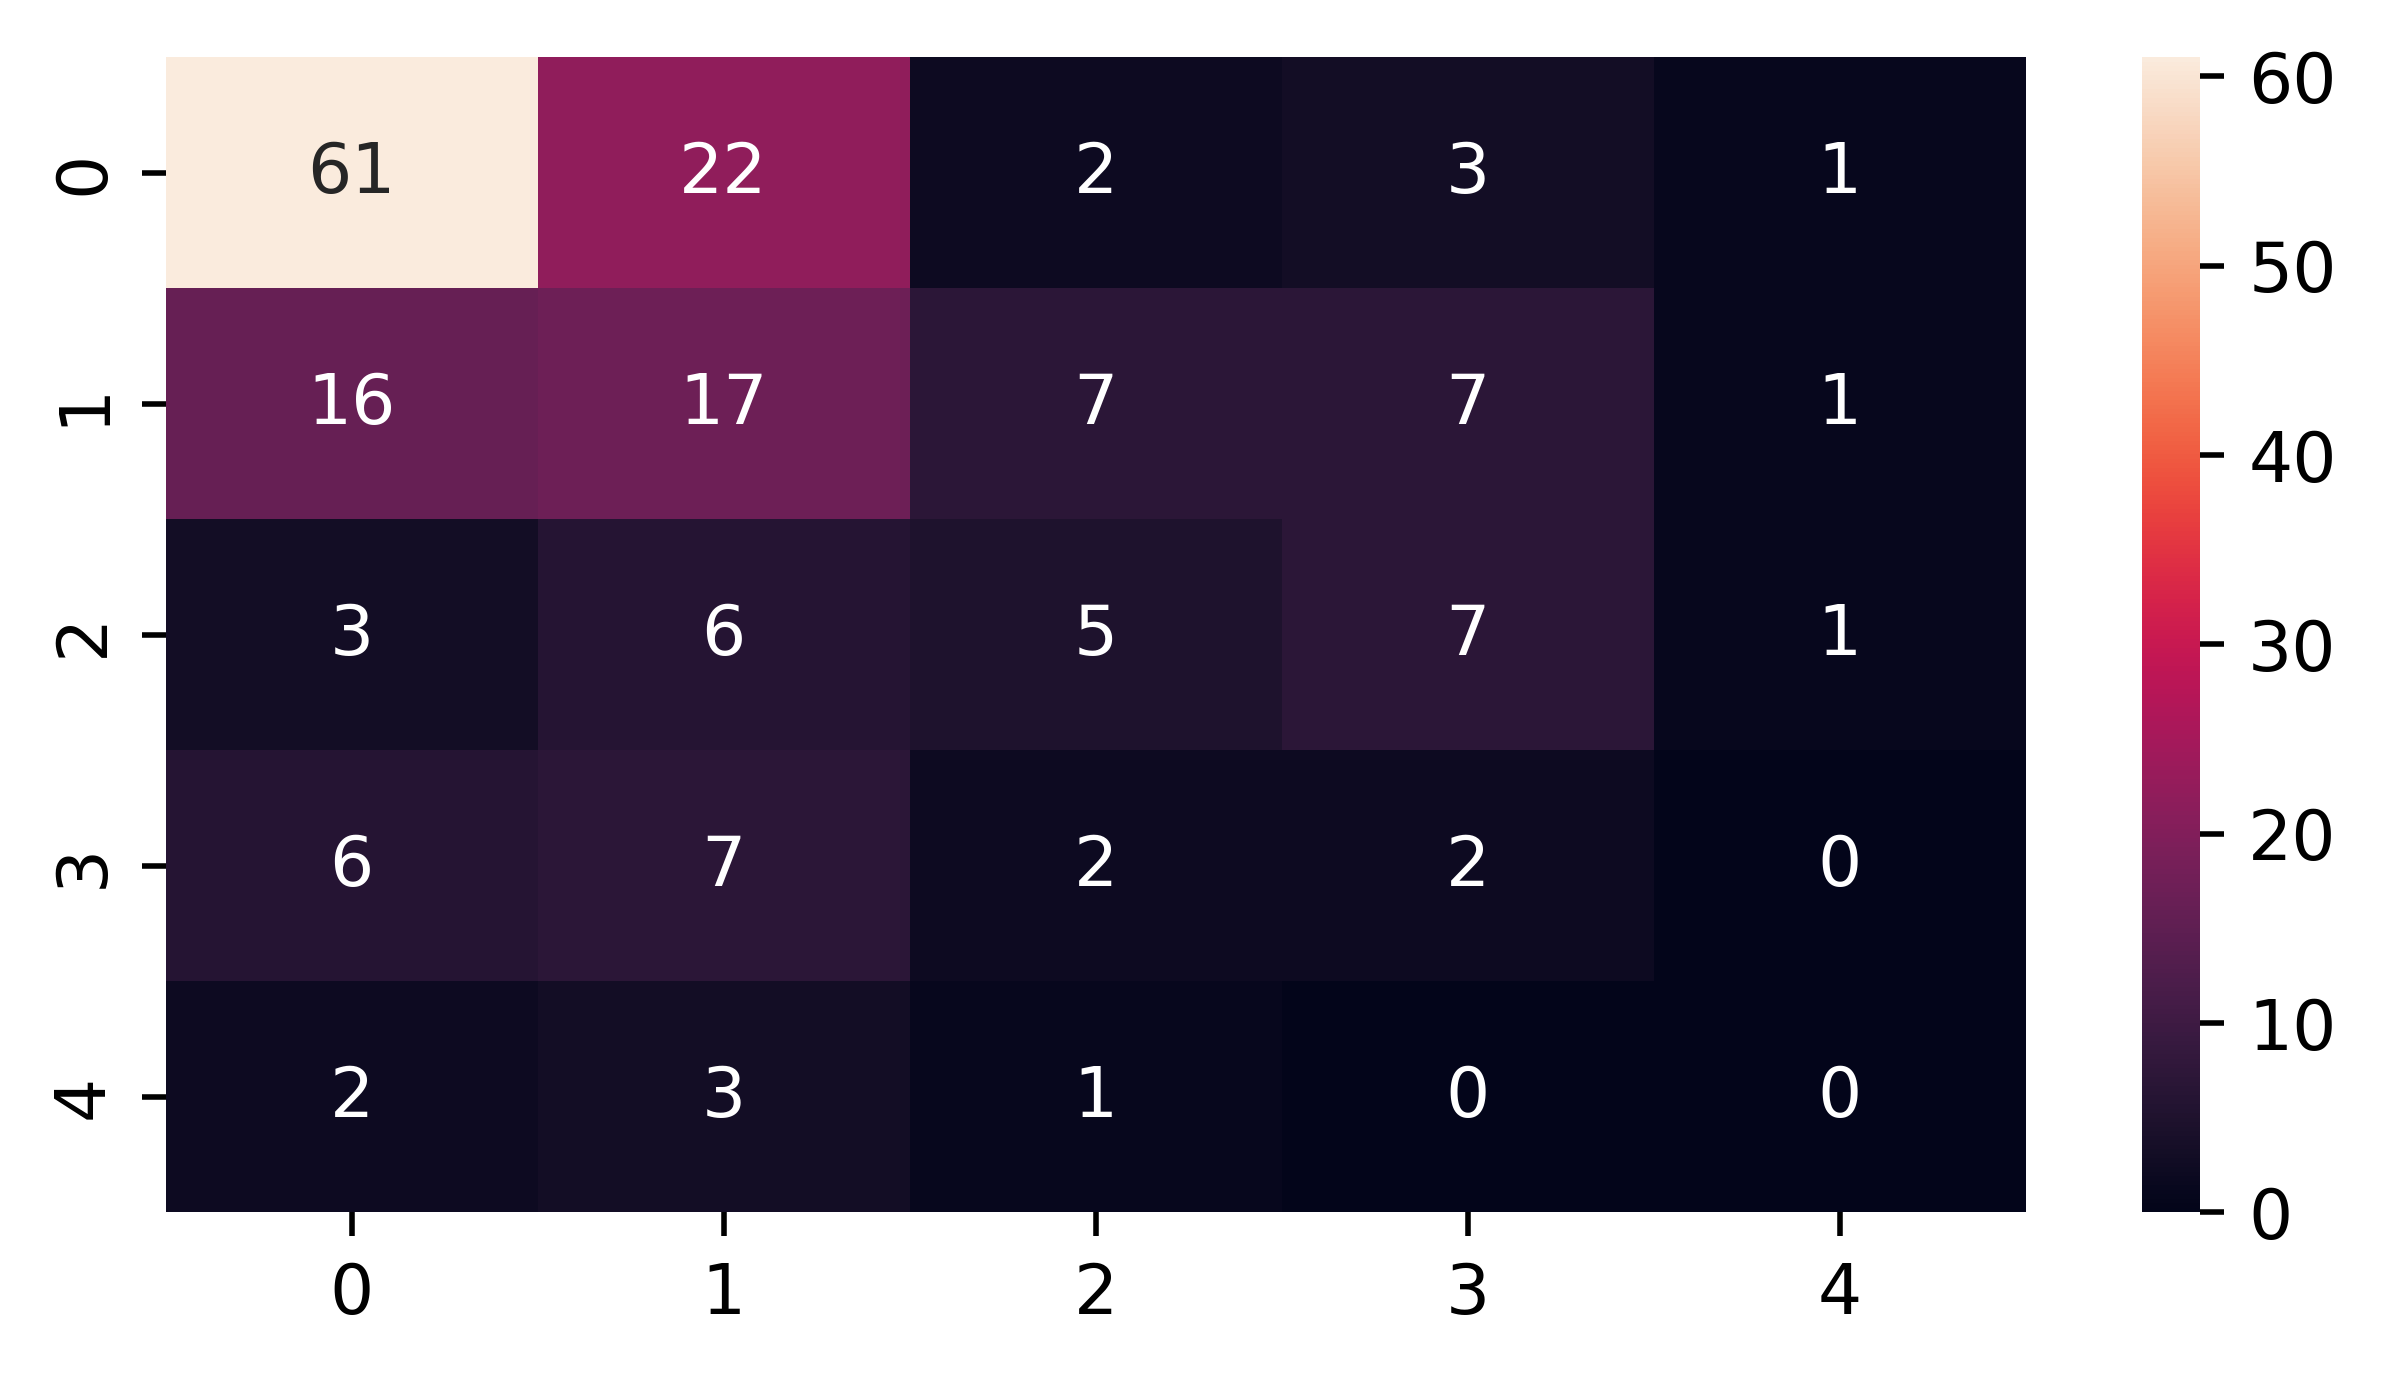

In [23]:
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(ytest, dt.predict(xtest)), annot=True)

In [24]:
data.columns

Index(['Age', 'Sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg',
       'max_heart_rate', 'ex_ang', 'oldpeak', 'slope', 'thal', 'target'],
      dtype='object')

In [25]:
cols=['Age', 'Sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg',
       'max_heart_rate', 'ex_ang', 'oldpeak', 'slope', 'thal', 'target']

[Text(0.4783764452571968, 0.9736842105263158, 'ex_ang <= 0.181\ngini = 0.698\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.1922192071731949, 0.9210526315789473, 'chol <= -1.419\ngini = 0.574\nsamples = 424\nvalue = [257, 90, 39, 28, 10]'),
 Text(0.3352978262151959, 0.9473684210526316, 'True  '),
 Text(0.05368098159509203, 0.868421052631579, 'max_heart_rate <= -1.156\ngini = 0.731\nsamples = 73\nvalue = [10, 26, 22, 13, 2]'),
 Text(0.028315243039169418, 0.8157894736842105, 'Age <= 0.405\ngini = 0.651\nsamples = 13\nvalue = [1, 2, 1, 7, 2]'),
 Text(0.018876828692779613, 0.7631578947368421, 'max_heart_rate <= -1.585\ngini = 0.776\nsamples = 7\nvalue = [1, 1, 1, 2, 2]'),
 Text(0.011326097215667769, 0.7105263157894737, 'max_heart_rate <= -1.827\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 0, 2]'),
 Text(0.0075507314771118455, 0.6578947368421053, 'restbp <= -0.291\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0]'),
 Text(0.0037753657385559227, 0.6052631578947368, 'gin

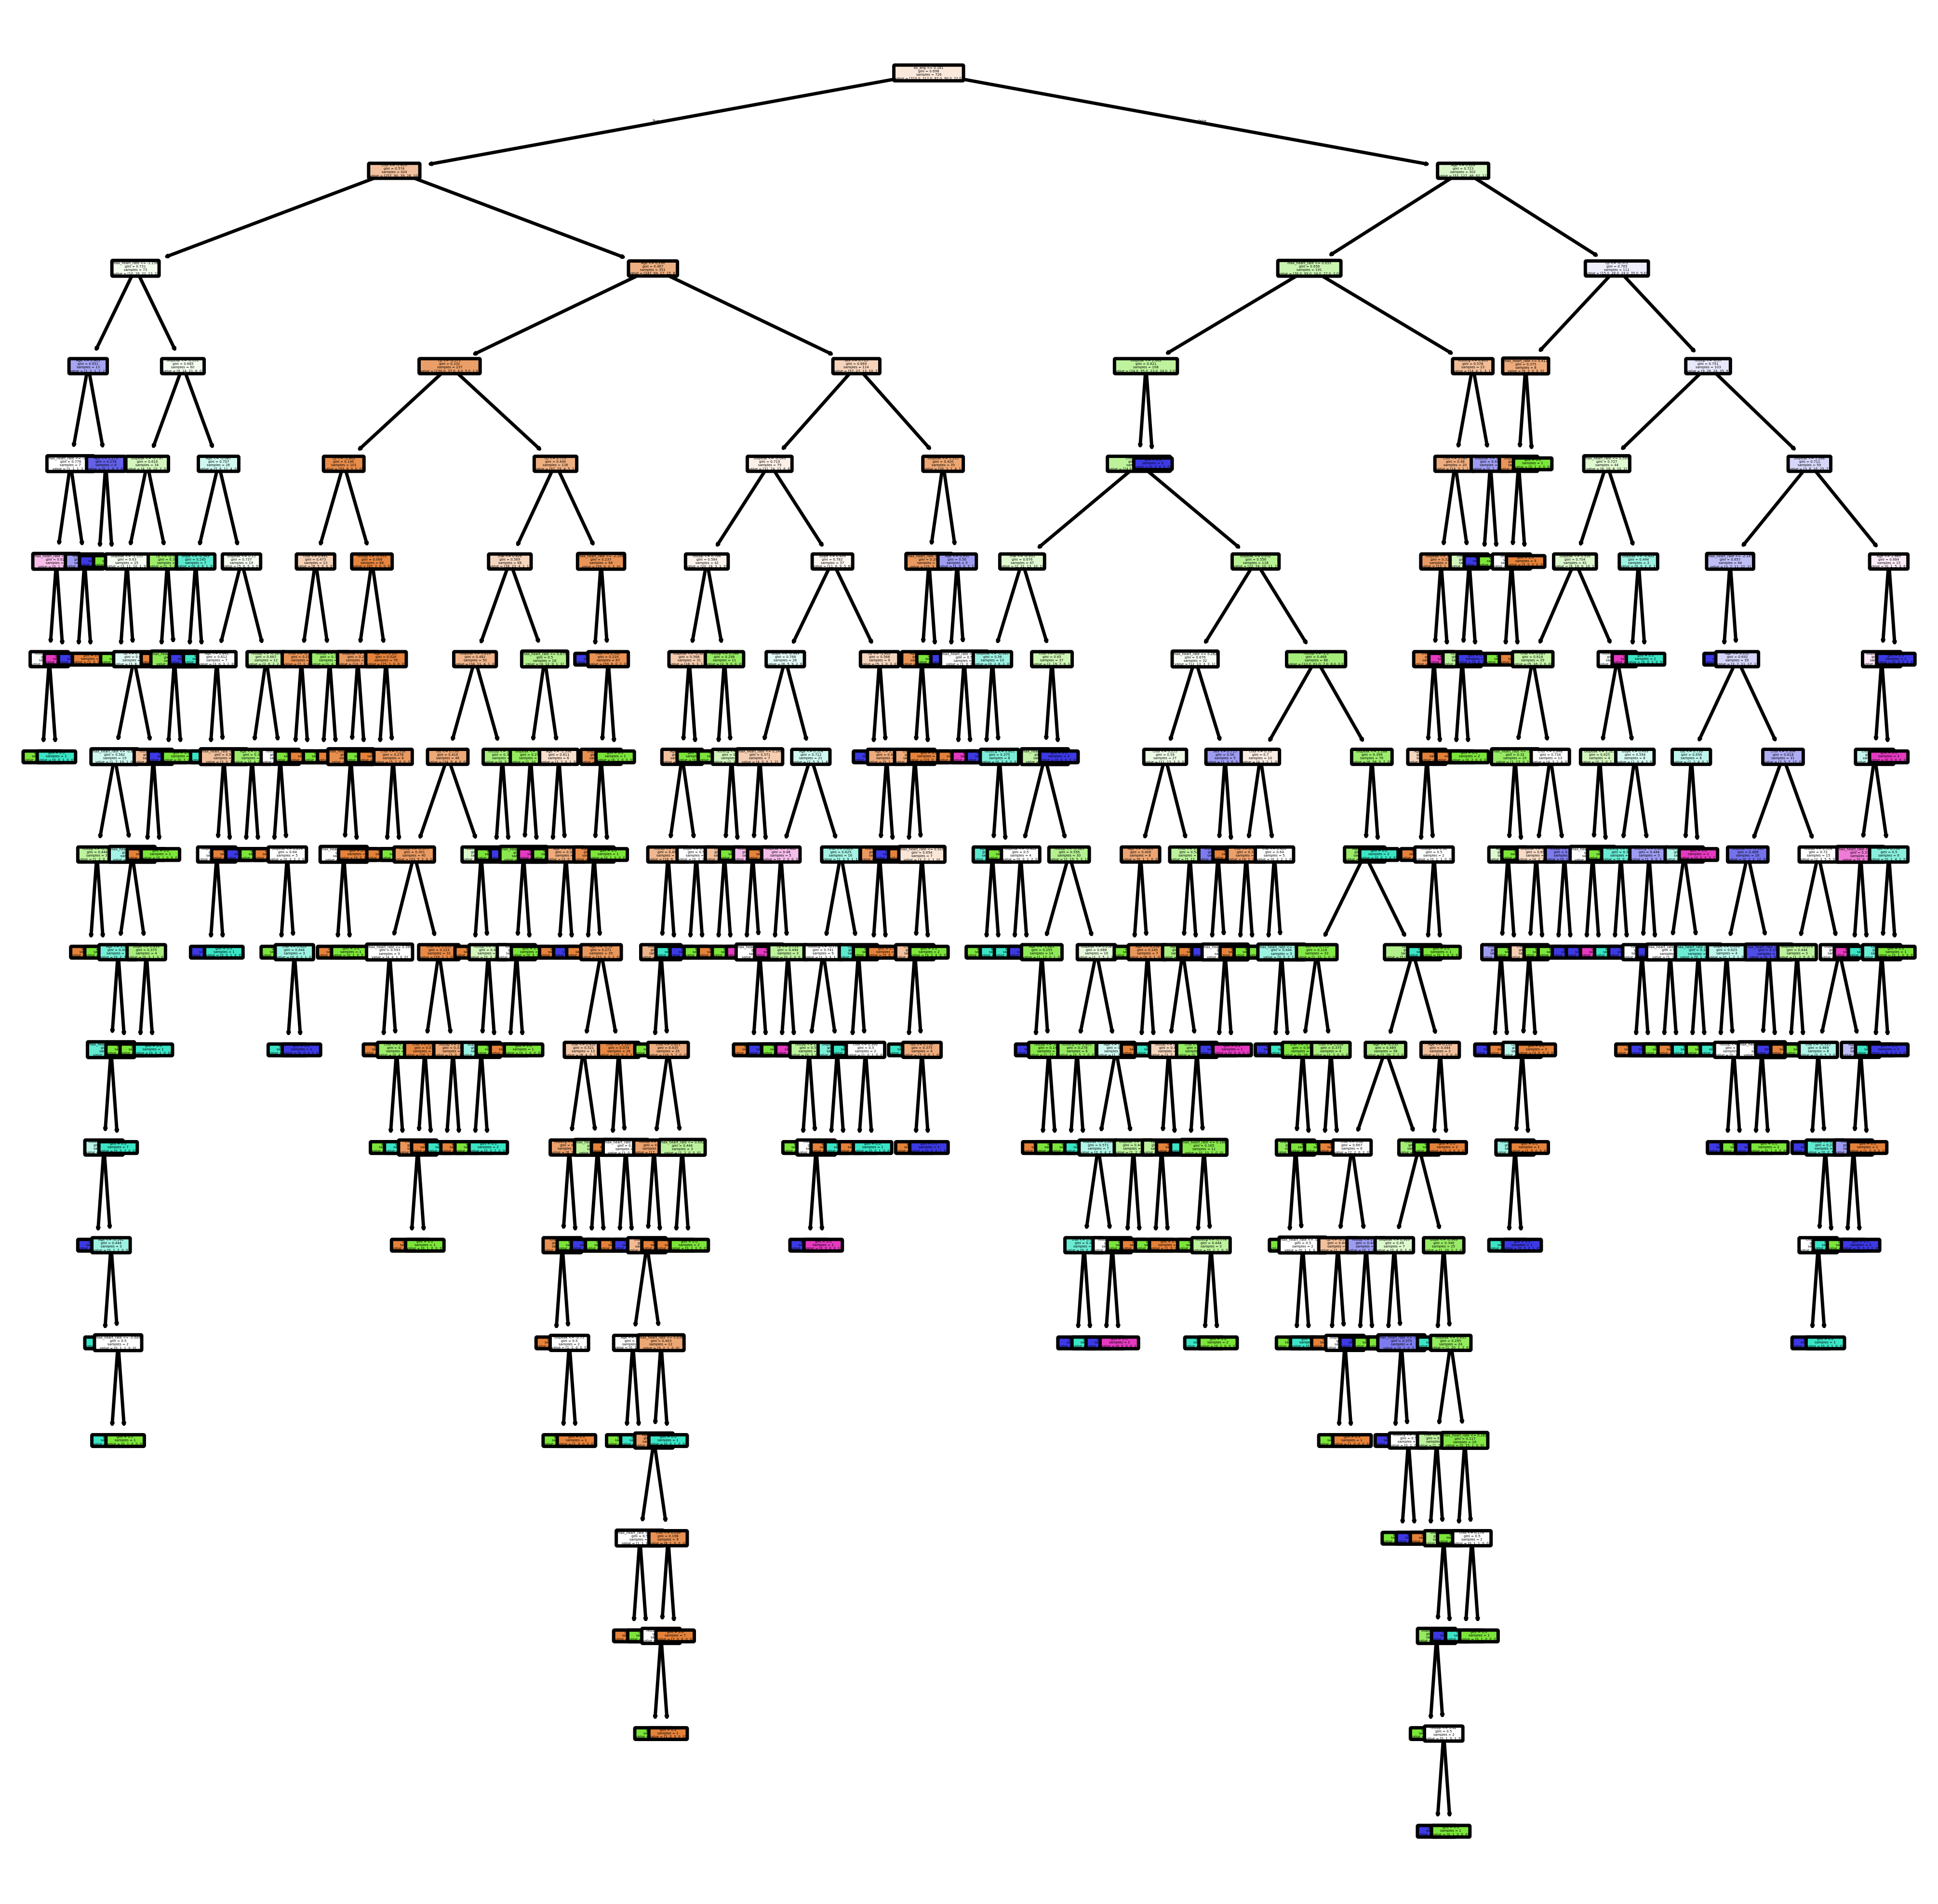

In [26]:
tree.plot_tree(dt, feature_names= cols,rounded =True,
              filled=True)

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
params= {'max_features': ('auto', 'sqrt', 'log2'),
              'max_depth' : (3,5, 6, 7, 8, 9),
              'criterion' :('gini', 'entropy'),
              'min_samples_split':(2,4,6)
             }

In [29]:
DT_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=params,cv=5,
                   verbose=True)

In [30]:
DT_grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 6, 7, 8, 9),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [31]:
DT_model = DecisionTreeClassifier(criterion='entropy',
                           max_depth=5, ccp_alpha=0.01, max_features='sqrt', min_samples_split=4)

In [32]:
DT_model.fit(xtrain,ytrain)
ypred  = DT_model.predict(xtest)

In [33]:
DT_model.score(xtrain, ytrain), DT_model.score(xtest, ytest)

(0.6088154269972452, 0.5604395604395604)

[Text(0.39, 0.9166666666666666, 'chol <= -1.419\nentropy = 1.938\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.16, 0.75, 'max_heart_rate <= -1.137\nentropy = 1.984\nsamples = 145\nvalue = [15, 54, 40, 33, 3]'),
 Text(0.275, 0.8333333333333333, 'True  '),
 Text(0.08, 0.5833333333333334, 'Age <= 0.187\nentropy = 1.926\nsamples = 31\nvalue = [2, 7, 5, 15, 2]'),
 Text(0.04, 0.4166666666666667, 'entropy = 1.561\nsamples = 8\nvalue = [0, 0, 3, 3, 2]'),
 Text(0.12, 0.4166666666666667, 'entropy = 1.625\nsamples = 23\nvalue = [2, 7, 2, 12, 0]'),
 Text(0.24, 0.5833333333333334, 'restbp <= 1.72\nentropy = 1.888\nsamples = 114\nvalue = [13, 47, 35, 18, 1]'),
 Text(0.2, 0.4166666666666667, 'oldpeak <= 0.909\nentropy = 1.822\nsamples = 109\nvalue = [12, 45, 35, 17, 0]'),
 Text(0.16, 0.25, 'entropy = 1.748\nsamples = 81\nvalue = [9, 41, 19, 12, 0]'),
 Text(0.24, 0.25, 'entropy = 1.651\nsamples = 28\nvalue = [3, 4, 16, 5, 0]'),
 Text(0.28, 0.4166666666666667, 'entropy = 1.922\nsa

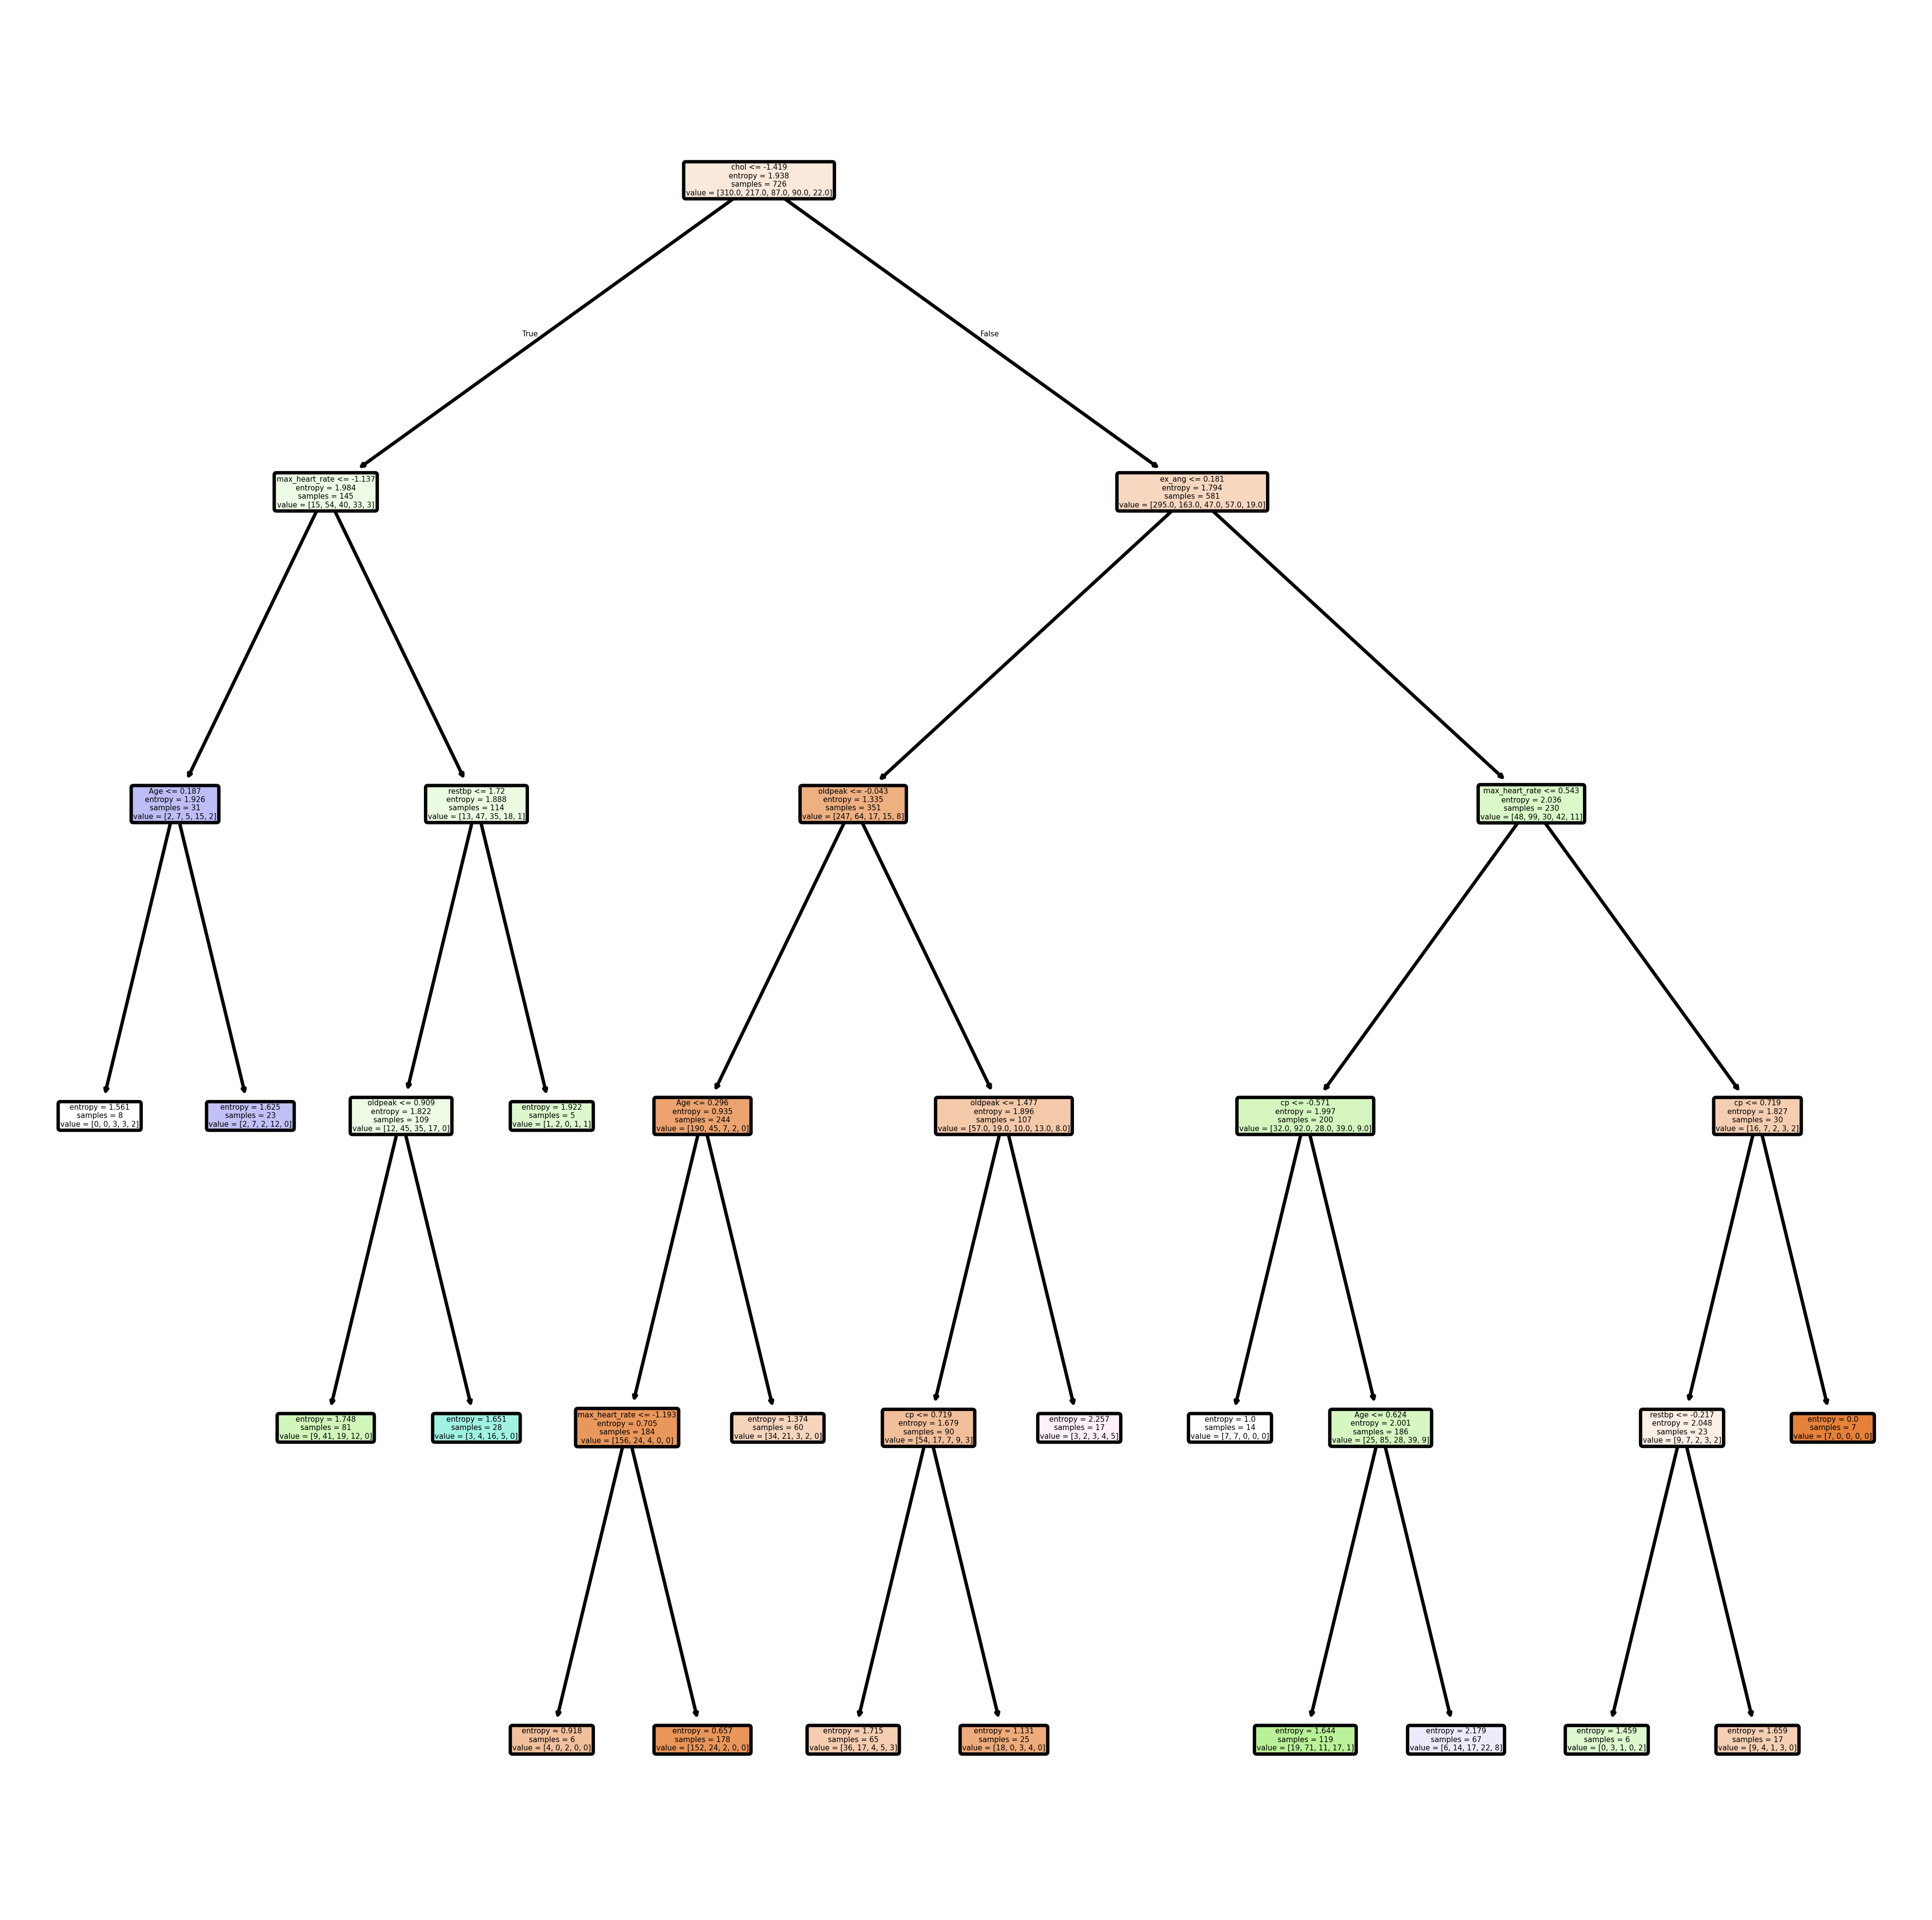

In [34]:
tree.plot_tree(DT_model, feature_names= cols, rounded= True,
              filled=True)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=1)

In [37]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 5, 6, 7, 8, 9),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_split': (2, 4, 6)},
             verbose=1)

In [38]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_split': 4}

In [39]:
dtr = DecisionTreeClassifier(criterion='gini',max_depth=3, ccp_alpha=0.01, max_features='log2', min_samples_split=4)

In [40]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

## Evaluation

In [41]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.559228650137741, 0.5604395604395604)

[Text(0.4, 0.875, 'chol <= -0.705\ngini = 0.698\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.2, 0.625, 'gini = 0.724\nsamples = 150\nvalue = [16, 57, 40, 33, 4]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'max_heart_rate <= 0.879\ngini = 0.645\nsamples = 576\nvalue = [294, 160, 47, 57, 18]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'ex_ang <= 0.181\ngini = 0.695\nsamples = 418\nvalue = [173, 137, 43, 51, 14]'),
 Text(0.2, 0.125, 'gini = 0.534\nsamples = 208\nvalue = [134.0, 43.0, 15.0, 11.0, 5.0]'),
 Text(0.6, 0.125, 'gini = 0.709\nsamples = 210\nvalue = [39, 94, 28, 40, 9]'),
 Text(0.8, 0.375, 'gini = 0.39\nsamples = 158\nvalue = [121, 23, 4, 6, 4]')]

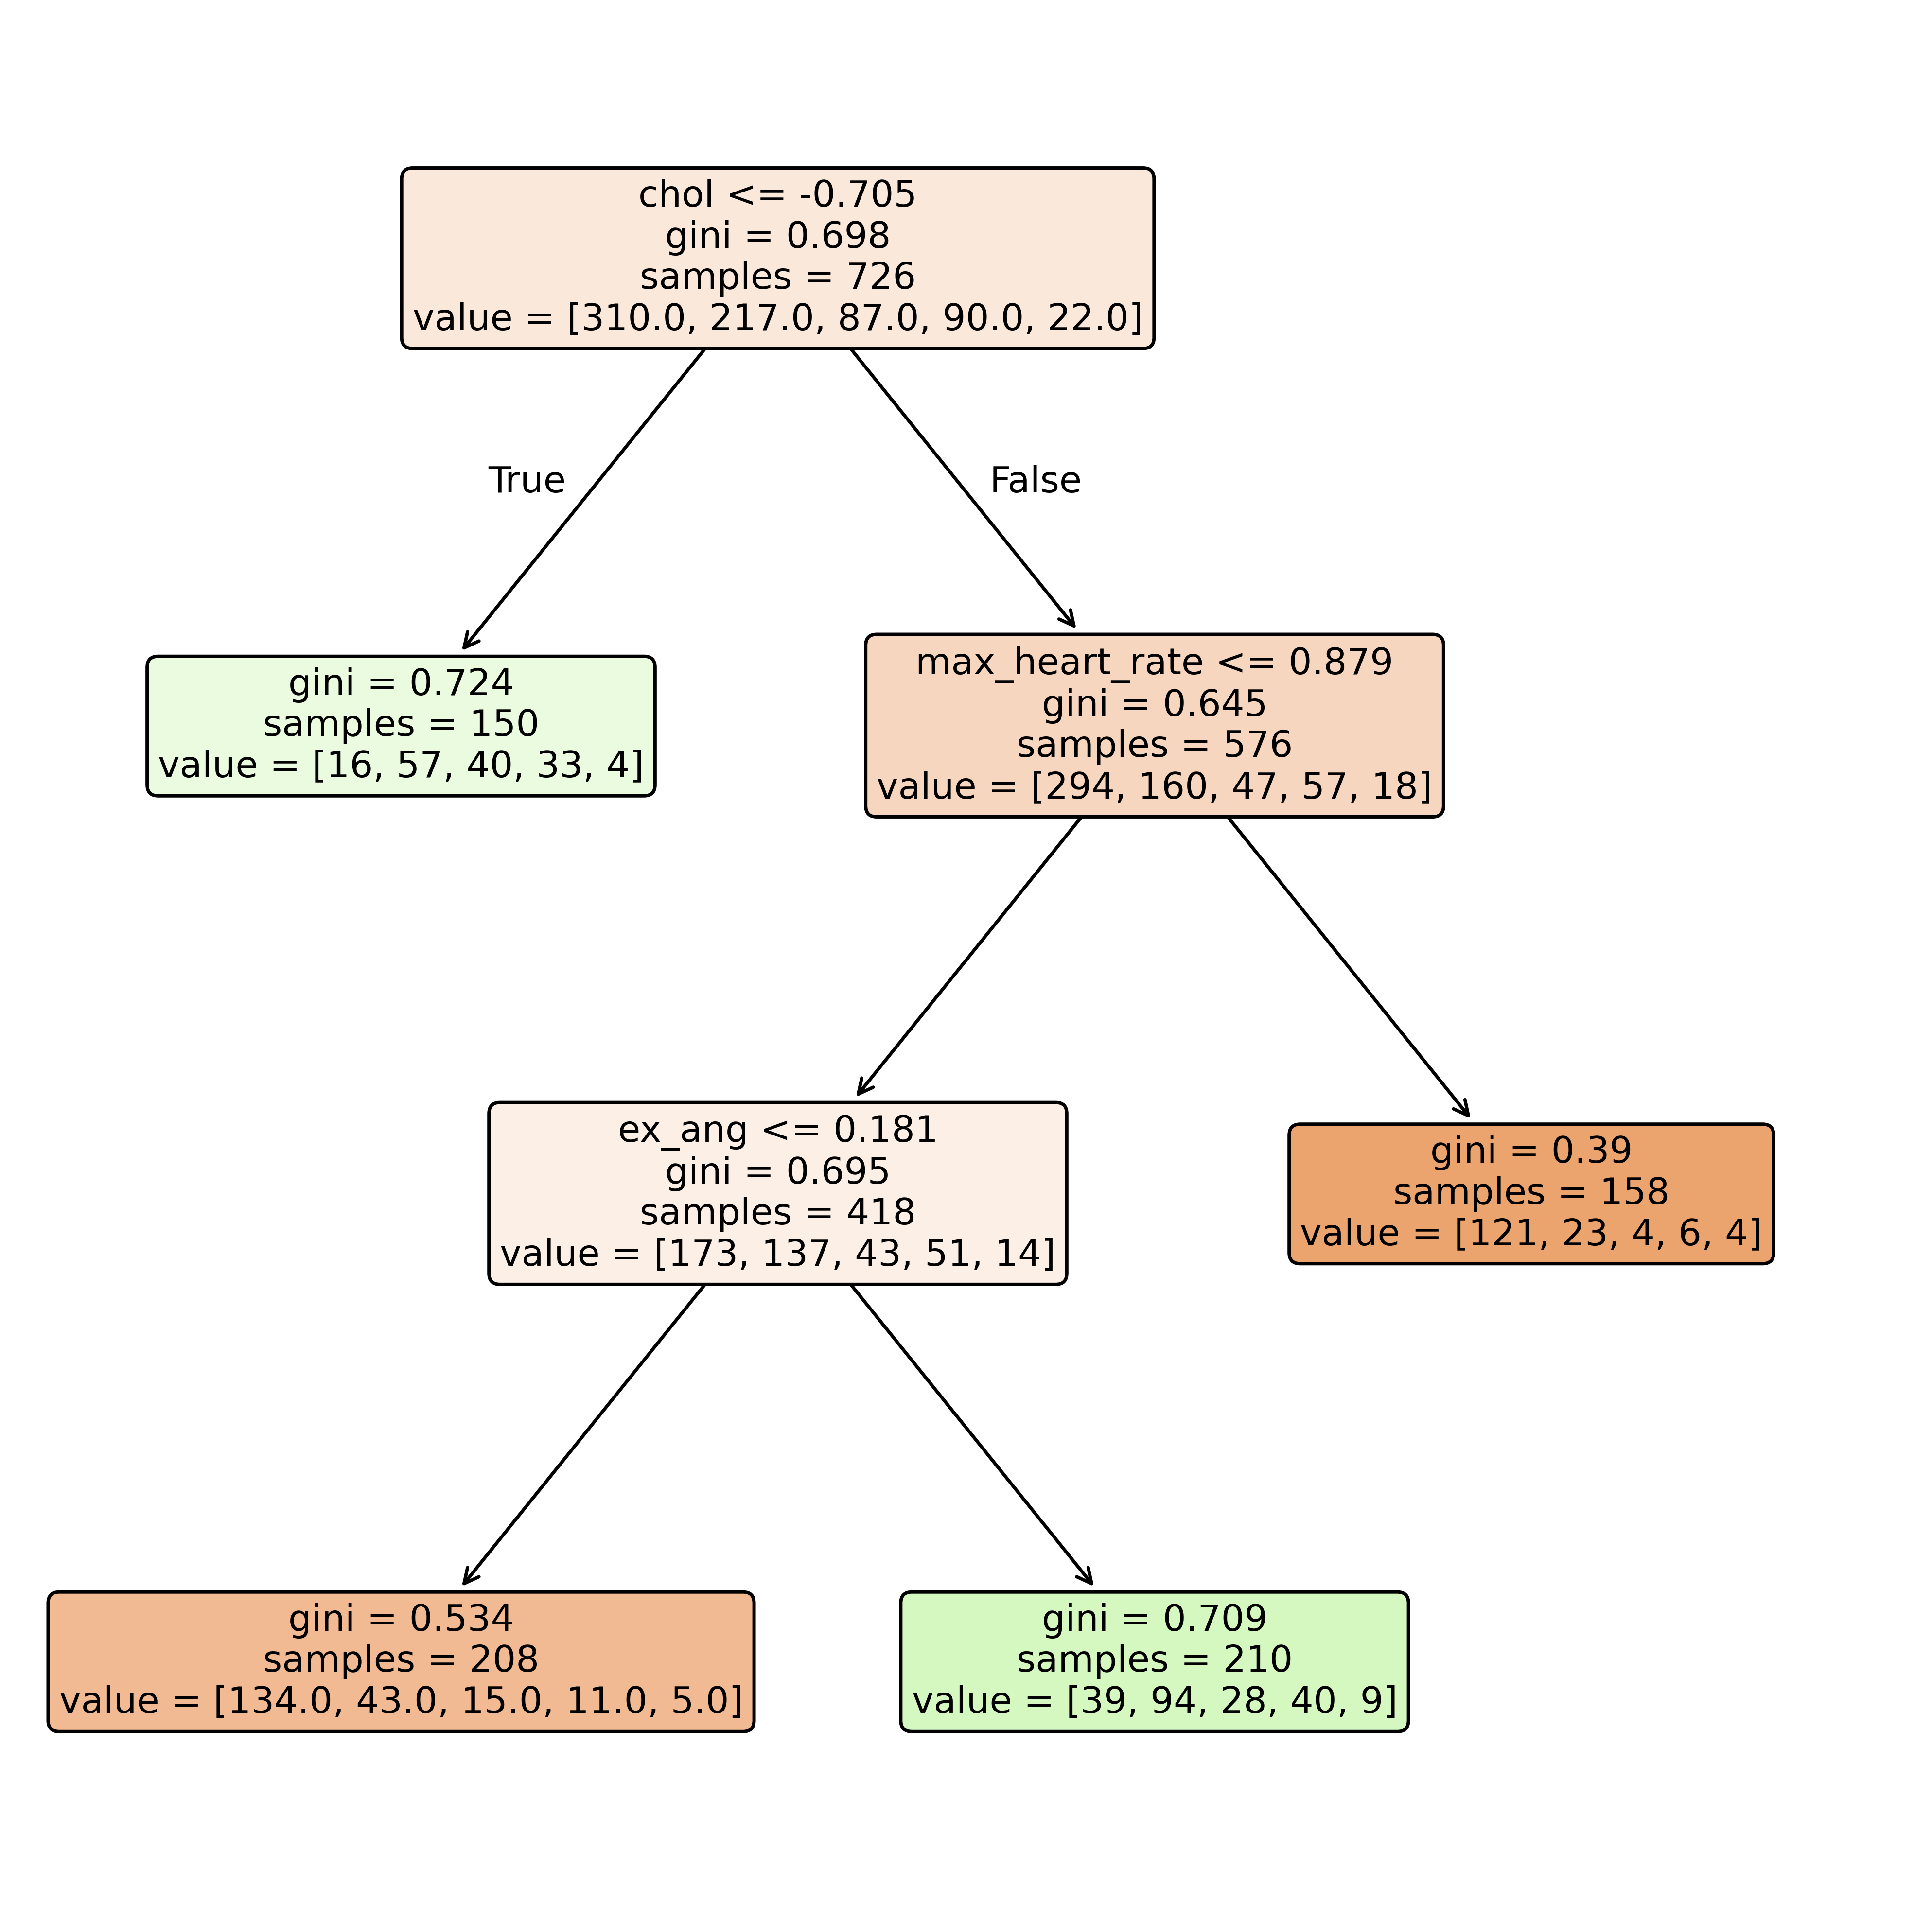

In [42]:
tree.plot_tree(dtr, feature_names= cols,rounded=True,filled=True)

## Interview Questions:

#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common hyperparameters of decision tree models include-
Max Depth: Limits the depth of the tree, preventing overfitting by controlling how deep the tree can grow.
Min Samples Split: Minimum number of samples required to split an internal node. Higher values prevent overfitting by ensuring nodes have enough data to justify a split.
Min Samples Leaf: Minimum number of samples required to be at a leaf node. Larger values prevent overfitting by ensuring leaf nodes have enough samples.
Max Features: Number of features to consider when looking for the best split. Limiting this can reduce overfitting and improve generalization.
Criterion: The function to measure the quality of a split (e.g., "gini" for Gini impurity, "entropy" for information gain). Different criteria can affect the splits and, thus, the performance.
Adjusting these hyperparameters helps balance the trade-off between bias and variance, impacting the model's accuracy and generalization.

#### 2. What is the difference between the Label encoding and One-hot encoding?

Label encoding - This is type of data transformation technique.
When the data type of a column is object we need to convert it into numeric for the machine to understand, therefore data transformation is done.
Talking about label_encoding it is particularly the encoding method for the target column having many classes.In label encoding, each category is assigned a unique integer label.These are assigned in the alphabetical order.owever, using label encoding for nominal categorical variables (where there is no inherent order) can introduce unintended relationships between categories. Example: In a dataset with colors as a categorical variable, label encoding might assign "red" as 0, "blue" as 1, etc.

One-hot encoding -This is also a type of data transformation technique.
It is used for the independant columns required for model building. In this type of encoding onlu binary format is present.For ex. 1 (hot), and all others are 0 (cold).It is suitable for nominal categorical variables, where there is no inherent order among the categories.
This encoding avoids introducing unintended relationships between categories, making it more suitable for machine learning algorithms. Example: Using one-hot encoding on the same color variable would create three binary variables: "red" represented as [1, 0, 0], "blue" as [0, 1, 0], and "green" as [0, 0, 1].